In [1]:
import sys
import networkx as nx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import powerlaw

In [2]:
result = []
with open('com-dblp.top5000.cmty.txt','r') as f:
    for line in f:
        result.append(list(line.strip('\n').split(',')))

In [3]:
set5000 = []
for i in range(len(result)):
    tryy = ''.join(result[i])
    a = set(tryy.split())
    set5000.append(a)

In [4]:
sort5000 = sorted(set5000, key = len, reverse = True)

In [5]:
for i in range(5000):
    for j in range(i+1,5000):
        sort5000[j] = sort5000[j] - sort5000[i]

In [6]:
final5000 = sorted(sort5000, key = len, reverse = True)

In [7]:
len(final5000[35])

274

In [8]:
len(final5000[75])

37

In [9]:
comsize = []
for i in range(35,76):
    comsize.append(len(final5000[i]))

In [10]:
comsize

[274,
 256,
 244,
 222,
 200,
 197,
 189,
 183,
 183,
 177,
 148,
 141,
 130,
 116,
 103,
 94,
 90,
 86,
 78,
 76,
 62,
 62,
 58,
 53,
 51,
 47,
 46,
 46,
 44,
 44,
 43,
 42,
 41,
 41,
 41,
 40,
 40,
 39,
 37,
 37,
 37]

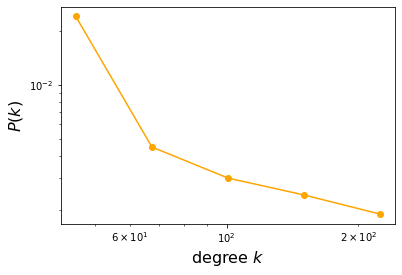

In [11]:
# Get 10 logarithmically spaced bins between kmin and kmax
bin_edges = np.logspace(np.log10(37), np.log10(274), num=6)
#nonpy包里用logspace就可以将区间取log分成十份

# histogram the data into these bins
density, _ = np.histogram(comsize, bins=bin_edges, density=True)

# plot
fig = plt.figure(figsize=(6,4))

# "x" should be midpoint (IN LOG SPACE) of each bin
log_be = np.log10(bin_edges)
#先把bin.edges转成log下的数值
x = 10**((log_be[1:] + log_be[:-1])/2)
#x是每个区间的中点

plt.loglog(x, density, marker='o', color = "orange", linestyle='-')
plt.xlabel(r"degree $k$", fontsize=16)
plt.ylabel(r"$P(k)$", fontsize=16)
#plt.xlim(1,110)
# Show the plot
plt.show()

In [12]:
#plot
G = nx.barabasi_albert_graph(1000, 10, seed=None, initial_graph=None)
degrees = [G.degree(node) for node in G]#把所有点的度拿出来放在一个list里面
fit = powerlaw.Fit(degrees2, discrete=True);
FigCCDF = fit.plot_ccdf(color='k',alpha=0.2, lw=8, label=r"Empirical");
fit.power_law.plot_ccdf(color='#b15928', linestyle='--', lw=3, ax=FigCCDF, label="Powerlaw Fit");

# adjust the labels
FigCCDF.set_ylabel("$p(X≥x)$")
FigCCDF.set_xlabel("k")
handles, labels = FigCCDF.get_legend_handles_labels()
leg = FigCCDF.legend(handles, labels, loc=3)
leg.draw_frame(True)

NameError: name 'degrees2' is not defined

In [ ]:
final5000[35:76]

In [ ]:
lstsub = []
for i in range(35,76):
    for every in iter(final5000[i]):
        lstsub.append(int(every))
#print(lstsub)
#len(lstsub)

In [ ]:
G = nx.read_edgelist('com-dblp.ungraph.txt', comments='#',
                     create_using=nx.Graph(), 
                     delimiter='	', 
                     nodetype=int, 
                     encoding='utf-8')

In [ ]:
H = G.subgraph(lstsub)

In [ ]:
len(H.nodes)

In [ ]:
H.degree()

In [ ]:
remove = [node for node,degree in H.degree() if degree < 1]
#remove

In [ ]:
#nx.is_frozen(H)
F = nx.Graph(H)
nx.is_frozen(F)
F.remove_nodes_from(remove)

In [ ]:
print(len(F.nodes))
print(len(F.edges))

In [ ]:
#nx.write_edgelist(H,'real.txt')

In [ ]:
l1 = sorted(list(map(int,F.nodes())))#原始节点 排序
l2 = range(F.number_of_nodes())#新节点 排序
##新老节点一一对应
nodes = dict(map(lambda x,y:[x,y],l1,l2)) 
edge_list=[]
for u,v in H.edges():
    edge_list.append((nodes[int(u)],nodes[int(v)]))
new_H=nx.Graph()
new_H.add_edges_from(edge_list)
nx.write_edgelist(new_H,'network_lianxu.txt',data=False)

In [ ]:
F.degree()
degrees2 = [F.degree(node) for node in F]#把所有点的度拿出来放在一个list里面
kmin = min(degrees)
kmax = max(degrees)
print(kmin, kmax)

In [ ]:
#nodes

In [ ]:
#int(list(final5000[35])[0])

In [ ]:
#nodes.items()
orders = list(nodes)
membershipGN = []
for k in range(len(orders)):
    for i in range(35,76):
        for j in range(len(final5000[i])):
            if(orders[k] == int(list(final5000[i])[j])):
                membershipGN.append(i-35)

In [ ]:
membershipGN

In [ ]:
#orders = list(nodes)
#type(orders[1])

In [ ]:
len(membershipGN)

In [ ]:
membershipGNDF = pd.DataFrame(membershipGN)

In [ ]:
membershipGNDF.to_csv('membershipGN.csv',index=False)

In [ ]:
tryy = ''.join(result[1])
print(tryy)

In [ ]:
#set5000

In [ ]:
#tryyy = set(result[0])
#print(tryyy)

In [ ]:
a = set(tryy.split())
print(a)
len(a)

In [ ]:
#print(result)

In [ ]:
vv = []

In [ ]:
vv.append(a)

In [ ]:
print(vv)

In [ ]:
vv[1]

In [ ]:
len(result)

In [ ]:
set5000